# model_0 configuration & training

In [1]:
# Choosing of single GPU - has to be done before tensorflow import:
# All the notebooks used earlier with that option have to be closed or to have to have restarted the kernel
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="2"        # Will use only single GPU device

In [2]:
import numpy as np
import pandas as pd
import my_functions
import keras
from keras import layers
from keras import models
from keras import optimizers
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')
tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow backend.
/home/artur/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/artur/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/artur/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/artur/.local/lib/python3.6/site-packages/tensorflow/python/fra

## 1. Model configuration - first approximation
- Already existing models:

In [3]:
%%bash
ls ./Models

- New model:

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

model.name = 'model_0'
model.summary()

# function no. 3
my_functions.model_save(model, model.name) # model before training !

Model: "model_0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2951

## 2. Data loading and transformation
- Available data:

In [5]:
%%bash
ls ./Used_data

TEST_IMAGES.npy
TEST_LABELS.npy
TRAIN_IMAGES.npy
TRAIN_LABELS.npy
TRAIN_X_EXTD.npy
TRAIN_Y_EXTD.npy
VALID_IMAGES.npy
VALID_LABELS.npy


In [6]:
# Loads and transforms 'Used data' to CNN training

train_x_name = 'TRAIN_IMAGES.npy'
train_y_name = 'TRAIN_LABELS.npy'

# function no. 2
TRAIN_X, VALID_X, TEST_X, TRAIN_Y, VALID_Y, TEST_Y = my_functions.data_conversion(train_x_name, train_y_name)


LOADED DATA (before conversion):
  set name              shape  dtype       data sight
0  TRAIN_X  (1600, 96, 96, 3)  uint8     [87, 73, 37]
1  TRAIN_Y            (1600,)  uint8                2
2  VALID_X   (500, 96, 96, 3)  uint8  [204, 205, 210]
3  VALID_Y             (500,)  uint8                1
4   TEST_X   (500, 96, 96, 3)  uint8  [132, 167, 203]
5   TEST_Y             (500,)  uint8                1

DATA FOR TRAINING (after conversion):
  set name              shape    dtype                            data sight
0  TRAIN_X  (1600, 96, 96, 3)  float32  [0.34117648, 0.28627452, 0.14509805]
1  TRAIN_Y          (1600, 2)  float32                            [0.0, 1.0]
2  VALID_X   (500, 96, 96, 3)  float32           [0.8, 0.8039216, 0.8235294]
3  VALID_Y           (500, 2)  float32                            [1.0, 0.0]
4   TEST_X   (500, 96, 96, 3)  float32     [0.5176471, 0.654902, 0.79607844]
5   TEST_Y           (500, 2)  float32                            [1.0, 0.0]


## 3. Model training

For the training the models without 'trd' have to be choosen,
models with 'trd' are trained already

- Available models to choice:

In [7]:
%%bash
ls ./Models

model_0.h5


### 3.1 model_0 & optimizer sgd

Train on 1600 samples, validate on 500 samples
Epoch 1/150
1600/1600 [==============================] - 4s 3ms/step - loss: 0.6934 - acc: 0.4881 - val_loss: 0.6918 - val_acc: 0.5220
Epoch 2/150
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6927 - acc: 0.4881 - val_loss: 0.6913 - val_acc: 0.5220
Epoch 3/150
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6921 - acc: 0.4919 - val_loss: 0.6908 - val_acc: 0.5240
Epoch 4/150
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6916 - acc: 0.5069 - val_loss: 0.6904 - val_acc: 0.5480
Epoch 5/150
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6910 - acc: 0.5188 - val_loss: 0.6900 - val_acc: 0.5980
Epoch 6/150
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6905 - acc: 0.6056 - val_loss: 0.6896 - val_acc: 0.6680
Epoch 7/150
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6899 - acc: 0.6087 - val_loss: 0.6892 - val_acc: 0.7140
Epoch 8/

Epoch 61/150
1600/1600 [==============================] - 2s 1ms/step - loss: 0.4540 - acc: 0.7950 - val_loss: 0.3986 - val_acc: 0.8340
Epoch 62/150
1600/1600 [==============================] - 2s 1ms/step - loss: 0.4218 - acc: 0.8213 - val_loss: 0.3943 - val_acc: 0.8340
Epoch 63/150
1600/1600 [==============================] - 2s 1ms/step - loss: 0.4805 - acc: 0.7788 - val_loss: 0.4320 - val_acc: 0.8040
Epoch 64/150
1600/1600 [==============================] - 2s 1ms/step - loss: 0.4188 - acc: 0.8194 - val_loss: 0.3940 - val_acc: 0.8180
Epoch 65/150
1600/1600 [==============================] - 2s 1ms/step - loss: 0.4387 - acc: 0.7944 - val_loss: 0.3993 - val_acc: 0.8400
Epoch 66/150
1600/1600 [==============================] - 2s 1ms/step - loss: 0.3986 - acc: 0.8294 - val_loss: 0.5642 - val_acc: 0.7000
Epoch 67/150
1600/1600 [==============================] - 2s 1ms/step - loss: 0.4132 - acc: 0.8275 - val_loss: 0.3715 - val_acc: 0.8400
Epoch 68/150
1600/1600 [========================

Epoch 121/150
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2046 - acc: 0.9194 - val_loss: 0.2456 - val_acc: 0.9000
Epoch 122/150
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1720 - acc: 0.9444 - val_loss: 0.2829 - val_acc: 0.8860
Epoch 123/150
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1754 - acc: 0.9362 - val_loss: 0.2431 - val_acc: 0.8960
Epoch 124/150
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2446 - acc: 0.9056 - val_loss: 0.2701 - val_acc: 0.8880
Epoch 125/150
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1726 - acc: 0.9388 - val_loss: 0.2113 - val_acc: 0.9200
Epoch 126/150
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1615 - acc: 0.9456 - val_loss: 0.2167 - val_acc: 0.9180
Epoch 127/150
1600/1600 [==============================] - 2s 992us/step - loss: 0.1605 - acc: 0.9506 - val_loss: 0.2453 - val_acc: 0.9100
Epoch 128/150
1600/1600 [==============

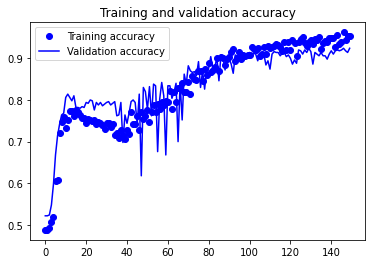

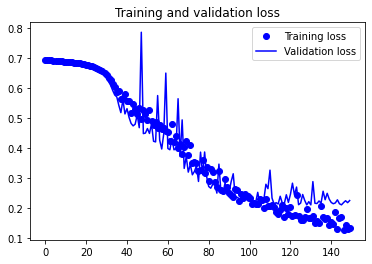

In [8]:
model = keras.models.load_model('./Models/model_0.h5') # not trained model!

epochs = 150
batch_size = 100
optimizer = 'sgd'
optimizer_name = optimizer
trd_model_name = 'model_0_0-100-150-sgd-trd' # model after training, name without file extension !
notebook = 'Module_1'
model_descr = '32-64-128-256-512'
dataset_size = len(TRAIN_X)

# Training (function no. 23)

acc = my_functions.train_and_chart(batch_size, epochs, model, optimizer, 
                                   TRAIN_X, TRAIN_Y, VALID_X, VALID_Y, trd_model_name)
del(model)

In [9]:
remark = '100-overfit'

# Results saving (function no. 6)

my_functions.results_update(trd_model_name, model_descr, notebook, dataset_size, 
                            batch_size, epochs, optimizer_name, acc, remark)

# Results overview (function no. 8)

summary = pd.DataFrame(my_functions.results_preview()) 
summary.index = summary.index + 1
summary

,model_name,model_description,notebook,dataset_size,batch_size,epochs,optimizer,acc,remarks
1,model_0_0-100-150-sgd-trd,32-64-128-256-512,Module_1,1600,100,150,sgd,0.924,100-overfit


### 3.2 model_0 & optimizer adadelta:

Train on 1600 samples, validate on 500 samples
Epoch 1/150
1600/1600 [==============================] - 2s 2ms/step - loss: 0.6905 - acc: 0.5356 - val_loss: 0.6920 - val_acc: 0.4780
Epoch 2/150
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6960 - acc: 0.5788 - val_loss: 0.6936 - val_acc: 0.4780
Epoch 3/150
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6871 - acc: 0.5375 - val_loss: 0.6782 - val_acc: 0.7140
Epoch 4/150
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6650 - acc: 0.6294 - val_loss: 0.6870 - val_acc: 0.5220
Epoch 5/150
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6982 - acc: 0.5756 - val_loss: 0.6781 - val_acc: 0.4880
Epoch 6/150
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6230 - acc: 0.6769 - val_loss: 0.5277 - val_acc: 0.8380
Epoch 7/150
1600/1600 [==============================] - 2s 1ms/step - loss: 0.5442 - acc: 0.7644 - val_loss: 0.4720 - val_acc: 0.8060
Epoch 8/

1600/1600 [==============================] - 2s 1ms/step - loss: 6.0653e-06 - acc: 1.0000 - val_loss: 0.8137 - val_acc: 0.9180
Epoch 119/150
1600/1600 [==============================] - 2s 1ms/step - loss: 5.9645e-06 - acc: 1.0000 - val_loss: 0.8138 - val_acc: 0.9180
Epoch 120/150
1600/1600 [==============================] - 2s 1ms/step - loss: 5.8819e-06 - acc: 1.0000 - val_loss: 0.8129 - val_acc: 0.9180
Epoch 121/150
1600/1600 [==============================] - 2s 1ms/step - loss: 5.8064e-06 - acc: 1.0000 - val_loss: 0.8152 - val_acc: 0.9180
Epoch 122/150
1600/1600 [==============================] - 2s 1ms/step - loss: 5.7472e-06 - acc: 1.0000 - val_loss: 0.8155 - val_acc: 0.9180
Epoch 123/150
1600/1600 [==============================] - 2s 1ms/step - loss: 5.6376e-06 - acc: 1.0000 - val_loss: 0.8171 - val_acc: 0.9180
Epoch 124/150
1600/1600 [==============================] - 2s 1ms/step - loss: 5.5514e-06 - acc: 1.0000 - val_loss: 0.8181 - val_acc: 0.9180
Epoch 125/150
1600/1600 [==

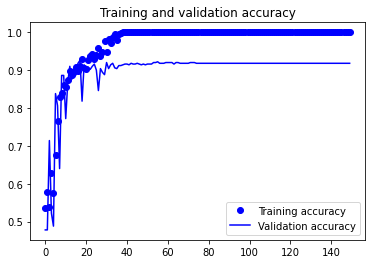

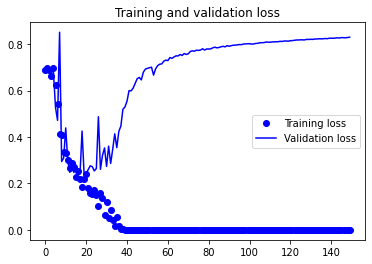

In [10]:
model = keras.models.load_model('./Models/model_0.h5')  # not trained model!

epochs = 150
batch_size = 100
optimizer = 'adadelta'
optimizer_name = optimizer
trd_model_name = 'model_0_0-100-150-adlt-trd' # model after training, name without file extension !
notebook = 'Module_1'
model_descr = '32-64-128-256-512'
dataset_size = len(TRAIN_X)

# Training (function no. 23)

acc = my_functions.train_and_chart(batch_size, epochs, model, optimizer, 
                                   TRAIN_X, TRAIN_Y, VALID_X, VALID_Y, trd_model_name)
del(model)

In [11]:
remark = '20-overfit'

# Results saving (function no. 6)

my_functions.results_update(trd_model_name, model_descr, notebook, dataset_size, 
                            batch_size, epochs, optimizer_name, acc, remark)

# Results overview (function no. 8)

summary = pd.DataFrame(my_functions.results_preview()) 
summary.index = summary.index + 1
summary

,model_name,model_description,notebook,dataset_size,batch_size,epochs,optimizer,acc,remarks
1,model_0_0-100-150-sgd-trd,32-64-128-256-512,Module_1,1600,100,150,sgd,0.924,100-overfit
2,model_0_0-100-150-adlt-trd,32-64-128-256-512,Module_1,1600,100,150,adadelta,0.918,20-overfit


### 3.3 model_0 & optimizer rmsprop:

Train on 1600 samples, validate on 500 samples
Epoch 1/120
1600/1600 [==============================] - 2s 2ms/step - loss: 0.7355 - acc: 0.5956 - val_loss: 0.6865 - val_acc: 0.5400
Epoch 2/120
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6612 - acc: 0.6294 - val_loss: 0.5365 - val_acc: 0.7720
Epoch 3/120
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6261 - acc: 0.7212 - val_loss: 0.4882 - val_acc: 0.8180
Epoch 4/120
1600/1600 [==============================] - 2s 1ms/step - loss: 0.5588 - acc: 0.7556 - val_loss: 0.5393 - val_acc: 0.7380
Epoch 5/120
1600/1600 [==============================] - 2s 1ms/step - loss: 0.4895 - acc: 0.7987 - val_loss: 0.5219 - val_acc: 0.7780
Epoch 6/120
1600/1600 [==============================] - 2s 1ms/step - loss: 0.4351 - acc: 0.8144 - val_loss: 0.5677 - val_acc: 0.6080
Epoch 7/120
1600/1600 [==============================] - 2s 1ms/step - loss: 0.4083 - acc: 0.8331 - val_loss: 0.4036 - val_acc: 0.8540
Epoch 8/

Epoch 119/120
1600/1600 [==============================] - 2s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1051 - val_acc: 0.9240
Epoch 120/120
500/500 [==============================] - 0s 488us/step
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
Validation accuracy 0.9240000247955322

Execution time:   0:03:20.265416


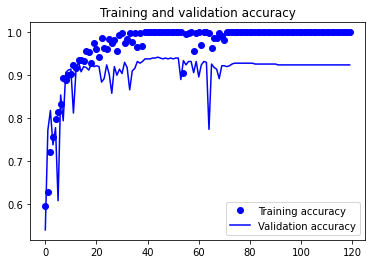

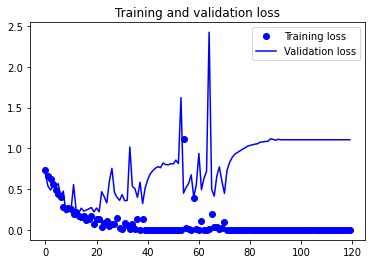

In [12]:
model = keras.models.load_model('./Models/model_0.h5') # not trained model!

epochs = 120
batch_size = 100
optimizer = 'rmsprop'
optimizer_name = optimizer
trd_model_name = 'model_0_0-100-120-rmsp-trd' # model after training, name without file extension !
notebook = 'Module_1'
model_descr = '32-64-128-256-512'
dataset_size = len(TRAIN_X)

# Training (function no. 23)

acc = my_functions.train_and_chart(batch_size, epochs, model, optimizer, 
                                   TRAIN_X, TRAIN_Y, VALID_X, VALID_Y, trd_model_name)
del(model)

In [13]:
remark = '15-overfit'

# Results saving (function no. 6)

my_functions.results_update(trd_model_name, model_descr, notebook, dataset_size, 
                            batch_size, epochs, optimizer_name, acc, remark)

# Results overview (function no. 8)

summary = pd.DataFrame(my_functions.results_preview()) 
summary.index = summary.index + 1
summary

,model_name,model_description,notebook,dataset_size,batch_size,epochs,optimizer,acc,remarks
1,model_0_0-100-150-sgd-trd,32-64-128-256-512,Module_1,1600,100,150,sgd,0.924,100-overfit
2,model_0_0-100-150-adlt-trd,32-64-128-256-512,Module_1,1600,100,150,adadelta,0.918,20-overfit
3,model_0_0-100-120-rmsp-trd,32-64-128-256-512,Module_1,1600,100,120,rmsprop,0.924,15-overfit


### 3.4 model_0 & optimizer RMSprop(lr=1e-4)

Train on 1600 samples, validate on 500 samples
Epoch 1/100
1600/1600 [==============================] - 2s 2ms/step - loss: 0.6606 - acc: 0.6237 - val_loss: 0.5812 - val_acc: 0.7800
Epoch 2/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.5773 - acc: 0.7194 - val_loss: 0.5148 - val_acc: 0.7820
Epoch 3/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.5356 - acc: 0.7544 - val_loss: 0.4863 - val_acc: 0.7860
Epoch 4/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.4618 - acc: 0.8037 - val_loss: 0.5364 - val_acc: 0.7520
Epoch 5/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.4689 - acc: 0.7806 - val_loss: 0.5090 - val_acc: 0.7220
Epoch 6/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.4049 - acc: 0.8213 - val_loss: 0.3188 - val_acc: 0.8680
Epoch 7/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.3656 - acc: 0.8550 - val_loss: 0.3538 - val_acc: 0.8460
Epoch 8/

Epoch 61/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.0436 - acc: 0.9844 - val_loss: 0.2286 - val_acc: 0.9120
Epoch 62/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.0476 - acc: 0.9862 - val_loss: 0.2173 - val_acc: 0.9340
Epoch 63/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.0574 - acc: 0.9806 - val_loss: 0.2207 - val_acc: 0.9300
Epoch 64/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.0237 - acc: 0.9956 - val_loss: 0.2311 - val_acc: 0.9240
Epoch 65/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.0603 - acc: 0.9775 - val_loss: 0.2346 - val_acc: 0.9340
Epoch 66/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.0177 - acc: 0.9975 - val_loss: 0.2714 - val_acc: 0.9320
Epoch 67/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.0661 - acc: 0.9750 - val_loss: 0.2453 - val_acc: 0.9260
Epoch 68/100
1600/1600 [========================

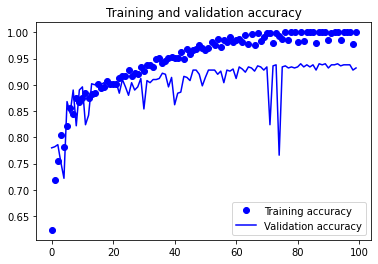

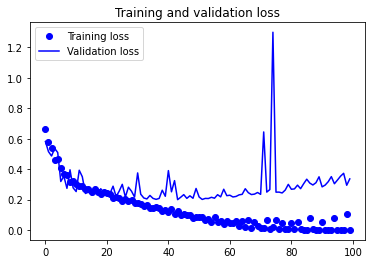

In [14]:
model = keras.models.load_model('./Models/model_0.h5') # not trained model!

epochs = 100
batch_size = 100
optimizer = optimizers.RMSprop(lr=1e-4)
optimizer_name = 'RMSprop(lr=1e-4)'
trd_model_name = 'model_0_0-100-100-RMSp-trd' # model after training, name without file extension !
notebook = 'Module_1'
model_descr = '32-64-128-256-512'
dataset_size = len(TRAIN_X)

# Training (function no. 23)

acc = my_functions.train_and_chart(batch_size, epochs, model, optimizer, 
                                   TRAIN_X, TRAIN_Y, VALID_X, VALID_Y, trd_model_name)
del(model)

In [15]:
remark = '20-overfit'

# Results saving (function no. 6)

my_functions.results_update(trd_model_name, model_descr, notebook, dataset_size, 
                            batch_size, epochs, optimizer_name, acc, remark)

# Results overview (function no. 8)

summary = pd.DataFrame(my_functions.results_preview()) 
summary.index = summary.index + 1
summary

,model_name,model_description,notebook,dataset_size,batch_size,epochs,optimizer,acc,remarks
1,model_0_0-100-150-sgd-trd,32-64-128-256-512,Module_1,1600,100,150,sgd,0.924,100-overfit
2,model_0_0-100-150-adlt-trd,32-64-128-256-512,Module_1,1600,100,150,adadelta,0.918,20-overfit
3,model_0_0-100-120-rmsp-trd,32-64-128-256-512,Module_1,1600,100,120,rmsprop,0.924,15-overfit
4,model_0_0-100-100-RMSp-trd,32-64-128-256-512,Module_1,1600,100,100,RMSprop(lr=1e-4),0.932,20-overfit


### 3.5 model_0 & optimizer sgd

Train on 1600 samples, validate on 500 samples
Epoch 1/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6934 - acc: 0.4881 - val_loss: 0.6918 - val_acc: 0.5220
Epoch 2/100
1600/1600 [==============================] - 2s 988us/step - loss: 0.6926 - acc: 0.4881 - val_loss: 0.6913 - val_acc: 0.5220
Epoch 3/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6921 - acc: 0.4881 - val_loss: 0.6909 - val_acc: 0.5260
Epoch 4/100
1600/1600 [==============================] - 2s 997us/step - loss: 0.6915 - acc: 0.4975 - val_loss: 0.6905 - val_acc: 0.5520
Epoch 5/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6910 - acc: 0.5419 - val_loss: 0.6900 - val_acc: 0.6100
Epoch 6/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6906 - acc: 0.6350 - val_loss: 0.6896 - val_acc: 0.6680
Epoch 7/100
1600/1600 [==============================] - 2s 998us/step - loss: 0.6900 - acc: 0.6631 - val_loss: 0.6891 - val_acc: 0.6980
Ep

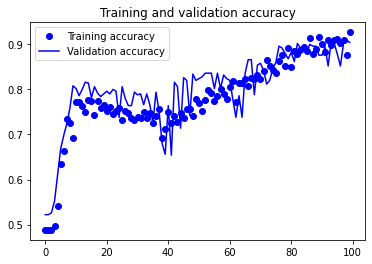

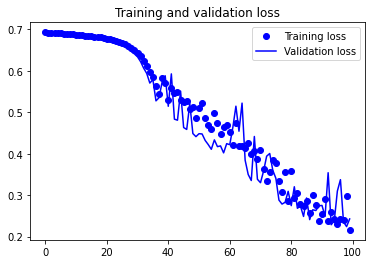

In [16]:
model = keras.models.load_model('./Models/model_0.h5') # not trained model!

epochs = 100
batch_size = 100
optimizer = 'sgd'
optimizer_name = optimizer
trd_model_name = 'model_0_0-100-100-sgd-trd' # model after training, name without file extension !
notebook = 'Module_1'
model_descr = '32-64-128-256-512'
dataset_size = len(TRAIN_X)

# Training (function no. 23)

acc = my_functions.train_and_chart(batch_size, epochs, model, optimizer, 
                                   TRAIN_X, TRAIN_Y, VALID_X, VALID_Y, trd_model_name)
del(model)

In [17]:
remark = 'no overfit'

# Results saving (function no. 6)

my_functions.results_update(trd_model_name, model_descr, notebook, dataset_size, 
                            batch_size, epochs, optimizer_name, acc, remark)

# Results overview (function no. 8)

summary = pd.DataFrame(my_functions.results_preview()) 
summary.index = summary.index + 1
summary

,model_name,model_description,notebook,dataset_size,batch_size,epochs,optimizer,acc,remarks
1,model_0_0-100-150-sgd-trd,32-64-128-256-512,Module_1,1600,100,150,sgd,0.924,100-overfit
2,model_0_0-100-150-adlt-trd,32-64-128-256-512,Module_1,1600,100,150,adadelta,0.918,20-overfit
3,model_0_0-100-120-rmsp-trd,32-64-128-256-512,Module_1,1600,100,120,rmsprop,0.924,15-overfit
4,model_0_0-100-100-RMSp-trd,32-64-128-256-512,Module_1,1600,100,100,RMSprop(lr=1e-4),0.932,20-overfit
5,model_0_0-100-100-sgd-trd,32-64-128-256-512,Module_1,1600,100,100,sgd,0.904,no overfit


### 3.6 model_0 & optimizer sgd

Train on 1600 samples, validate on 500 samples
Epoch 1/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.6927 - acc: 0.4975 - val_loss: 0.6908 - val_acc: 0.5460
Epoch 2/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6909 - acc: 0.6206 - val_loss: 0.6892 - val_acc: 0.6700
Epoch 3/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6891 - acc: 0.7038 - val_loss: 0.6876 - val_acc: 0.8160
Epoch 4/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6869 - acc: 0.7387 - val_loss: 0.6853 - val_acc: 0.7980
Epoch 5/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6843 - acc: 0.7412 - val_loss: 0.6813 - val_acc: 0.7180
Epoch 6/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6811 - acc: 0.7269 - val_loss: 0.6765 - val_acc: 0.6660
Epoch 7/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6763 - acc: 0.6969 - val_loss: 0.6729 - val_acc: 0.7700
Epoch 8/

Epoch 61/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1091 - acc: 0.9613 - val_loss: 0.2241 - val_acc: 0.9240
Epoch 62/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.0838 - acc: 0.9769 - val_loss: 0.2628 - val_acc: 0.8960
Epoch 63/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.0997 - acc: 0.9650 - val_loss: 0.2737 - val_acc: 0.9160
Epoch 64/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.0853 - acc: 0.9775 - val_loss: 0.3530 - val_acc: 0.8940
Epoch 65/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.0864 - acc: 0.9712 - val_loss: 0.2673 - val_acc: 0.9000
Epoch 66/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1061 - acc: 0.9594 - val_loss: 0.2713 - val_acc: 0.9100
Epoch 67/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.0720 - acc: 0.9744 - val_loss: 0.3481 - val_acc: 0.8960
Epoch 68/100
1600/1600 [========================

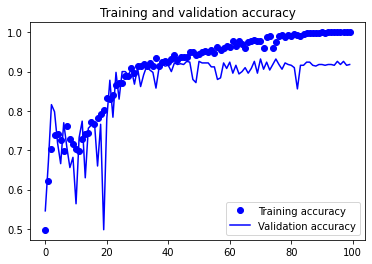

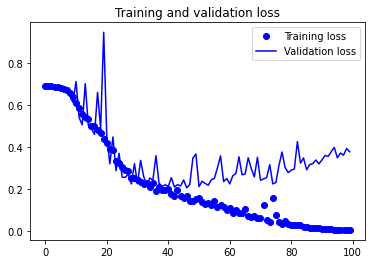

In [18]:
model = keras.models.load_model('./Models/model_0.h5') # not trained model!

epochs = 100
batch_size = 30
optimizer = 'sgd'
optimizer_name = optimizer
trd_model_name = 'model_0_0-30-100-sgd-trd' # model after training, name without file extension !
notebook = 'Module_1'
model_descr = '32-64-128-256-512'
dataset_size = len(TRAIN_X)

# Training (function no. 23)

acc = my_functions.train_and_chart(batch_size, epochs, model, optimizer, 
                                   TRAIN_X, TRAIN_Y, VALID_X, VALID_Y, trd_model_name)
del(model)

In [19]:
remark = '40-overfit'

# Results saving (function no. 6)

my_functions.results_update(trd_model_name, model_descr, notebook, dataset_size, 
                            batch_size, epochs, optimizer_name, acc, remark)

# Results overview (function no. 8)

summary = pd.DataFrame(my_functions.results_preview()) 
summary.index = summary.index + 1
summary

,model_name,model_description,notebook,dataset_size,batch_size,epochs,optimizer,acc,remarks
1,model_0_0-100-150-sgd-trd,32-64-128-256-512,Module_1,1600,100,150,sgd,0.924,100-overfit
2,model_0_0-100-150-adlt-trd,32-64-128-256-512,Module_1,1600,100,150,adadelta,0.918,20-overfit
3,model_0_0-100-120-rmsp-trd,32-64-128-256-512,Module_1,1600,100,120,rmsprop,0.924,15-overfit
4,model_0_0-100-100-RMSp-trd,32-64-128-256-512,Module_1,1600,100,100,RMSprop(lr=1e-4),0.932,20-overfit
5,model_0_0-100-100-sgd-trd,32-64-128-256-512,Module_1,1600,100,100,sgd,0.904,no overfit
6,model_0_0-30-100-sgd-trd,32-64-128-256-512,Module_1,1600,30,100,sgd,0.918,40-overfit


### 3.7 model_0 & optimizer sgd

Train on 1600 samples, validate on 500 samples
Epoch 1/40
1600/1600 [==============================] - 4s 2ms/step - loss: 0.6920 - acc: 0.5500 - val_loss: 0.6892 - val_acc: 0.6840
Epoch 2/40
1600/1600 [==============================] - 3s 2ms/step - loss: 0.6883 - acc: 0.6769 - val_loss: 0.6861 - val_acc: 0.7020
Epoch 3/40
1600/1600 [==============================] - 3s 2ms/step - loss: 0.6833 - acc: 0.6794 - val_loss: 0.6800 - val_acc: 0.7040
Epoch 4/40
1600/1600 [==============================] - 3s 2ms/step - loss: 0.6744 - acc: 0.7131 - val_loss: 0.6640 - val_acc: 0.7900
Epoch 5/40
1600/1600 [==============================] - 3s 2ms/step - loss: 0.6521 - acc: 0.7212 - val_loss: 0.6295 - val_acc: 0.7440
Epoch 6/40
1600/1600 [==============================] - 3s 2ms/step - loss: 0.6064 - acc: 0.6869 - val_loss: 0.5980 - val_acc: 0.6460
Epoch 7/40
1600/1600 [==============================] - 3s 2ms/step - loss: 0.5655 - acc: 0.7275 - val_loss: 0.5537 - val_acc: 0.7200
Epoch 8/40
1600

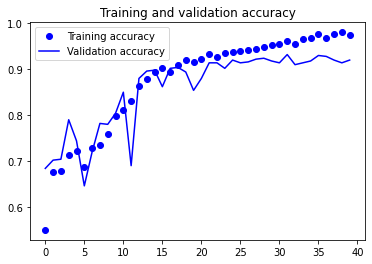

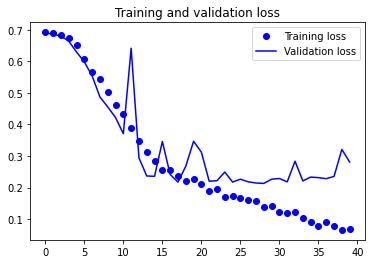

In [20]:
model = keras.models.load_model('./Models/model_0.h5') # not trained model!

epochs = 40
batch_size = 15
optimizer = 'sgd'
optimizer_name = optimizer
trd_model_name = 'model_0_0-15-40-sgd-trd' # model after training, name without file extension !
notebook = 'Module_1'
model_descr = '32-64-128-256-512'
dataset_size = len(TRAIN_X)

# Training (function no. 23)

acc = my_functions.train_and_chart(batch_size, epochs, model, optimizer, 
                                   TRAIN_X, TRAIN_Y, VALID_X, VALID_Y, trd_model_name)
del(model)

In [21]:
remark = '15-overfit'

# Results saving (function no. 6)

my_functions.results_update(trd_model_name, model_descr, notebook, dataset_size, 
                            batch_size, epochs, optimizer_name, acc, remark)

# Results overview (function no. 8)

summary = pd.DataFrame(my_functions.results_preview()) 
summary.index = summary.index + 1
summary

,model_name,model_description,notebook,dataset_size,batch_size,epochs,optimizer,acc,remarks
1,model_0_0-100-150-sgd-trd,32-64-128-256-512,Module_1,1600,100,150,sgd,0.924,100-overfit
2,model_0_0-100-150-adlt-trd,32-64-128-256-512,Module_1,1600,100,150,adadelta,0.918,20-overfit
3,model_0_0-100-120-rmsp-trd,32-64-128-256-512,Module_1,1600,100,120,rmsprop,0.924,15-overfit
4,model_0_0-100-100-RMSp-trd,32-64-128-256-512,Module_1,1600,100,100,RMSprop(lr=1e-4),0.932,20-overfit
5,model_0_0-100-100-sgd-trd,32-64-128-256-512,Module_1,1600,100,100,sgd,0.904,no overfit
6,model_0_0-30-100-sgd-trd,32-64-128-256-512,Module_1,1600,30,100,sgd,0.918,40-overfit
7,model_0_0-15-40-sgd-trd,32-64-128-256-512,Module_1,1600,15,40,sgd,0.920,15-overfit


### 3.8 model_0 & optimizer RMSprop(lr=1e-4)

Train on 1600 samples, validate on 500 samples
Epoch 1/25
1600/1600 [==============================] - 4s 3ms/step - loss: 0.5993 - acc: 0.6712 - val_loss: 0.4275 - val_acc: 0.8320
Epoch 2/25
1600/1600 [==============================] - 3s 2ms/step - loss: 0.4149 - acc: 0.8231 - val_loss: 0.4186 - val_acc: 0.8240
Epoch 3/25
1600/1600 [==============================] - 3s 2ms/step - loss: 0.3357 - acc: 0.8569 - val_loss: 0.2598 - val_acc: 0.8860
Epoch 4/25
1600/1600 [==============================] - 3s 2ms/step - loss: 0.2882 - acc: 0.8756 - val_loss: 0.3203 - val_acc: 0.8700
Epoch 5/25
1600/1600 [==============================] - 3s 2ms/step - loss: 0.2699 - acc: 0.8875 - val_loss: 0.2308 - val_acc: 0.9080
Epoch 6/25
1600/1600 [==============================] - 3s 2ms/step - loss: 0.2488 - acc: 0.9006 - val_loss: 0.2686 - val_acc: 0.8840
Epoch 7/25
1600/1600 [==============================] - 3s 2ms/step - loss: 0.2308 - acc: 0.9106 - val_loss: 0.2541 - val_acc: 0.9080
Epoch 8/25
1600

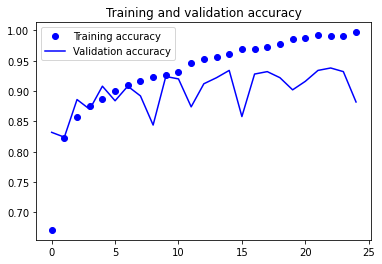

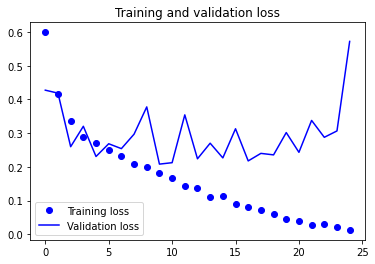

In [22]:
model = keras.models.load_model('./Models/model_0.h5') # not trained model!

epochs = 25
batch_size = 15
optimizer = optimizers.RMSprop(lr=1e-4)
optimizer_name = 'RMSprop(lr=1e-4)'
trd_model_name = 'model_0_0-15-25-RMSp-trd' # model after training, name without file extension !
notebook = 'Module_1'
model_descr = '32-64-128-256-512'
dataset_size = len(TRAIN_X)

# Training (function no. 23)

acc = my_functions.train_and_chart(batch_size, epochs, model, optimizer, 
                                   TRAIN_X, TRAIN_Y, VALID_X, VALID_Y, trd_model_name)
del(model)

In [23]:
remark = '6-overfit'

# Results saving (function no. 6)

my_functions.results_update(trd_model_name, model_descr, notebook, dataset_size, 
                            batch_size, epochs, optimizer_name, acc, remark)

# Results overview (function no. 8)

summary = pd.DataFrame(my_functions.results_preview()) 
summary.index = summary.index + 1
summary

,model_name,model_description,notebook,dataset_size,batch_size,epochs,optimizer,acc,remarks
1,model_0_0-100-150-sgd-trd,32-64-128-256-512,Module_1,1600,100,150,sgd,0.924,100-overfit
2,model_0_0-100-150-adlt-trd,32-64-128-256-512,Module_1,1600,100,150,adadelta,0.918,20-overfit
3,model_0_0-100-120-rmsp-trd,32-64-128-256-512,Module_1,1600,100,120,rmsprop,0.924,15-overfit
4,model_0_0-100-100-RMSp-trd,32-64-128-256-512,Module_1,1600,100,100,RMSprop(lr=1e-4),0.932,20-overfit
5,model_0_0-100-100-sgd-trd,32-64-128-256-512,Module_1,1600,100,100,sgd,0.904,no overfit
6,model_0_0-30-100-sgd-trd,32-64-128-256-512,Module_1,1600,30,100,sgd,0.918,40-overfit
7,model_0_0-15-40-sgd-trd,32-64-128-256-512,Module_1,1600,15,40,sgd,0.920,15-overfit
8,model_0_0-15-25-RMSp-trd,32-64-128-256-512,Module_1,1600,15,25,RMSprop(lr=1e-4),0.882,6-overfit


### 3.9 model_0 & optimizer rmsprop

Train on 1600 samples, validate on 500 samples
Epoch 1/15
1600/1600 [==============================] - 4s 3ms/step - loss: 0.7290 - acc: 0.6450 - val_loss: 0.6251 - val_acc: 0.7080
Epoch 2/15
1600/1600 [==============================] - 3s 2ms/step - loss: 0.4752 - acc: 0.8100 - val_loss: 0.2873 - val_acc: 0.9120
Epoch 3/15
1600/1600 [==============================] - 3s 2ms/step - loss: 0.3894 - acc: 0.8612 - val_loss: 0.4703 - val_acc: 0.7700
Epoch 4/15
1600/1600 [==============================] - 3s 2ms/step - loss: 0.3066 - acc: 0.8850 - val_loss: 0.2561 - val_acc: 0.8960
Epoch 5/15
1600/1600 [==============================] - 3s 2ms/step - loss: 0.2685 - acc: 0.9025 - val_loss: 0.2651 - val_acc: 0.9120
Epoch 6/15
1600/1600 [==============================] - 3s 2ms/step - loss: 0.2222 - acc: 0.9225 - val_loss: 0.2843 - val_acc: 0.8960
Epoch 7/15
1600/1600 [==============================] - 3s 2ms/step - loss: 0.2060 - acc: 0.9281 - val_loss: 0.3685 - val_acc: 0.8680
Epoch 8/15
1600

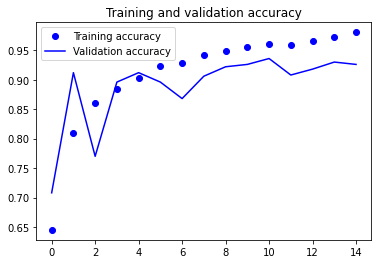

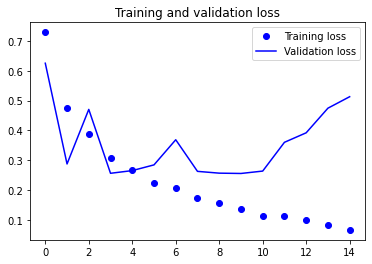

In [24]:
model = keras.models.load_model('./Models/model_0.h5') # not trained model!

epochs = 15
batch_size = 15
optimizer = 'rmsprop'
optimizer_name = optimizer
trd_model_name = 'model_0_0-15-15-rmsp-trd' # model after training, name without file extension !
notebook = 'Module_1'
model_descr = '32-64-128-256-512'
dataset_size = len(TRAIN_X)

# Training (function no. 23)

acc = my_functions.train_and_chart(batch_size, epochs, model, optimizer, 
                                   TRAIN_X, TRAIN_Y, VALID_X, VALID_Y, trd_model_name)
del(model)

In [25]:
remark = '4-overfit'

# Results saving (function no. 6)

my_functions.results_update(trd_model_name, model_descr, notebook, dataset_size, 
                            batch_size, epochs, optimizer_name, acc, remark)

# Results overview (function no. 8)

summary = pd.DataFrame(my_functions.results_preview()) 
summary.index = summary.index + 1
summary

,model_name,model_description,notebook,dataset_size,batch_size,epochs,optimizer,acc,remarks
1,model_0_0-100-150-sgd-trd,32-64-128-256-512,Module_1,1600,100,150,sgd,0.924,100-overfit
2,model_0_0-100-150-adlt-trd,32-64-128-256-512,Module_1,1600,100,150,adadelta,0.918,20-overfit
3,model_0_0-100-120-rmsp-trd,32-64-128-256-512,Module_1,1600,100,120,rmsprop,0.924,15-overfit
4,model_0_0-100-100-RMSp-trd,32-64-128-256-512,Module_1,1600,100,100,RMSprop(lr=1e-4),0.932,20-overfit
5,model_0_0-100-100-sgd-trd,32-64-128-256-512,Module_1,1600,100,100,sgd,0.904,no overfit
6,model_0_0-30-100-sgd-trd,32-64-128-256-512,Module_1,1600,30,100,sgd,0.918,40-overfit
7,model_0_0-15-40-sgd-trd,32-64-128-256-512,Module_1,1600,15,40,sgd,0.920,15-overfit
8,model_0_0-15-25-RMSp-trd,32-64-128-256-512,Module_1,1600,15,25,RMSprop(lr=1e-4),0.882,6-overfit
9,model_0_0-15-15-rmsp-trd,32-64-128-256-512,Module_1,1600,15,15,rmsprop,0.926,4-overfit
